In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
import warnings
warnings.filterwarnings('ignore')

# Problem 2

The dataset Education - Post 12th Standard.csv is a dataset which contains the names of various colleges. This particular case study is based on various parameters of various institutions. You are expected to do Principal Component Analysis for this case study according to the instructions given in the following rubric. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

In [131]:
df=pd.read_csv('D:\\ANALYTICS\\GREAT LEARNING\\11.Advanced Statistics-Week-4\\Education - Post 12th Standard-1.csv')

<b>2.1) Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented.</b>

In [52]:
df.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
df.tail()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
772,Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99
776,York College of Pennsylvania,2989,1855,691,28,63,2988,1726,4990,3560,500,1250,75,75,18.1,28,4509,99


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
Names          777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 109.3+ KB


In [6]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [7]:
df.mean()

Apps            3001.638353
Accept          2018.804376
Enroll           779.972973
Top10perc         27.558559
Top25perc         55.796654
F.Undergrad     3699.907336
P.Undergrad      855.298584
Outstate       10440.669241
Room.Board      4357.526384
Books            549.380952
Personal        1340.642214
PhD               72.660232
Terminal          79.702703
S.F.Ratio         14.089704
perc.alumni       22.743887
Expend          9660.171171
Grad.Rate         65.463320
dtype: float64

In [8]:
#5 Point summary Median,IQR,Range,Q1,Q3
df.median()

Apps           1558.0
Accept         1110.0
Enroll          434.0
Top10perc        23.0
Top25perc        54.0
F.Undergrad    1707.0
P.Undergrad     353.0
Outstate       9990.0
Room.Board     4200.0
Books           500.0
Personal       1200.0
PhD              75.0
Terminal         82.0
S.F.Ratio        13.6
perc.alumni      21.0
Expend         8377.0
Grad.Rate        65.0
dtype: float64

In [56]:
#IQR
df.quantile(0.75)-df.quantile(0.25)

Apps           2848.0
Accept         1820.0
Enroll          660.0
Top10perc        20.0
Top25perc        28.0
F.Undergrad    3013.0
P.Undergrad     872.0
Outstate       5605.0
Room.Board     1453.0
Books           130.0
Personal        850.0
PhD              23.0
Terminal         21.0
S.F.Ratio         5.0
perc.alumni      18.0
Expend         4079.0
Grad.Rate        25.0
dtype: float64

In [12]:
#Range
df.max(numeric_only=True)-df.min(numeric_only=True)

Apps           48013.0
Accept         26258.0
Enroll          6357.0
Top10perc         95.0
Top25perc         91.0
F.Undergrad    31504.0
P.Undergrad    21835.0
Outstate       19360.0
Room.Board      6344.0
Books           2244.0
Personal        6550.0
PhD               95.0
Terminal          76.0
S.F.Ratio         37.3
perc.alumni       64.0
Expend         53047.0
Grad.Rate        108.0
dtype: float64

In [13]:
df.std()

Apps           3870.201484
Accept         2451.113971
Enroll          929.176190
Top10perc        17.640364
Top25perc        19.804778
F.Undergrad    4850.420531
P.Undergrad    1522.431887
Outstate       4023.016484
Room.Board     1096.696416
Books           165.105360
Personal        677.071454
PhD              16.328155
Terminal         14.722359
S.F.Ratio         3.958349
perc.alumni      12.391801
Expend         5221.768440
Grad.Rate        17.177710
dtype: float64

In [14]:
df.var()

Apps           1.497846e+07
Accept         6.007960e+06
Enroll         8.633684e+05
Top10perc      3.111825e+02
Top25perc      3.922292e+02
F.Undergrad    2.352658e+07
P.Undergrad    2.317799e+06
Outstate       1.618466e+07
Room.Board     1.202743e+06
Books          2.725978e+04
Personal       4.584258e+05
PhD            2.666086e+02
Terminal       2.167478e+02
S.F.Ratio      1.566853e+01
perc.alumni    1.535567e+02
Expend         2.726687e+07
Grad.Rate      2.950737e+02
dtype: float64

In [15]:
df.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


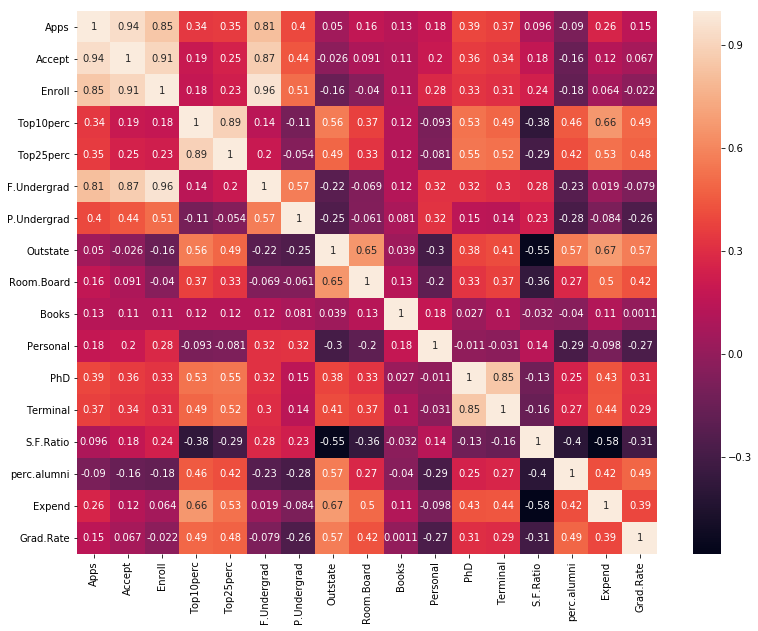

In [25]:
plt.subplots(figsize=(13,10))
sns.heatmap(df.corr(),annot=True)

D:\ANALYTICS\ANACONDA\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


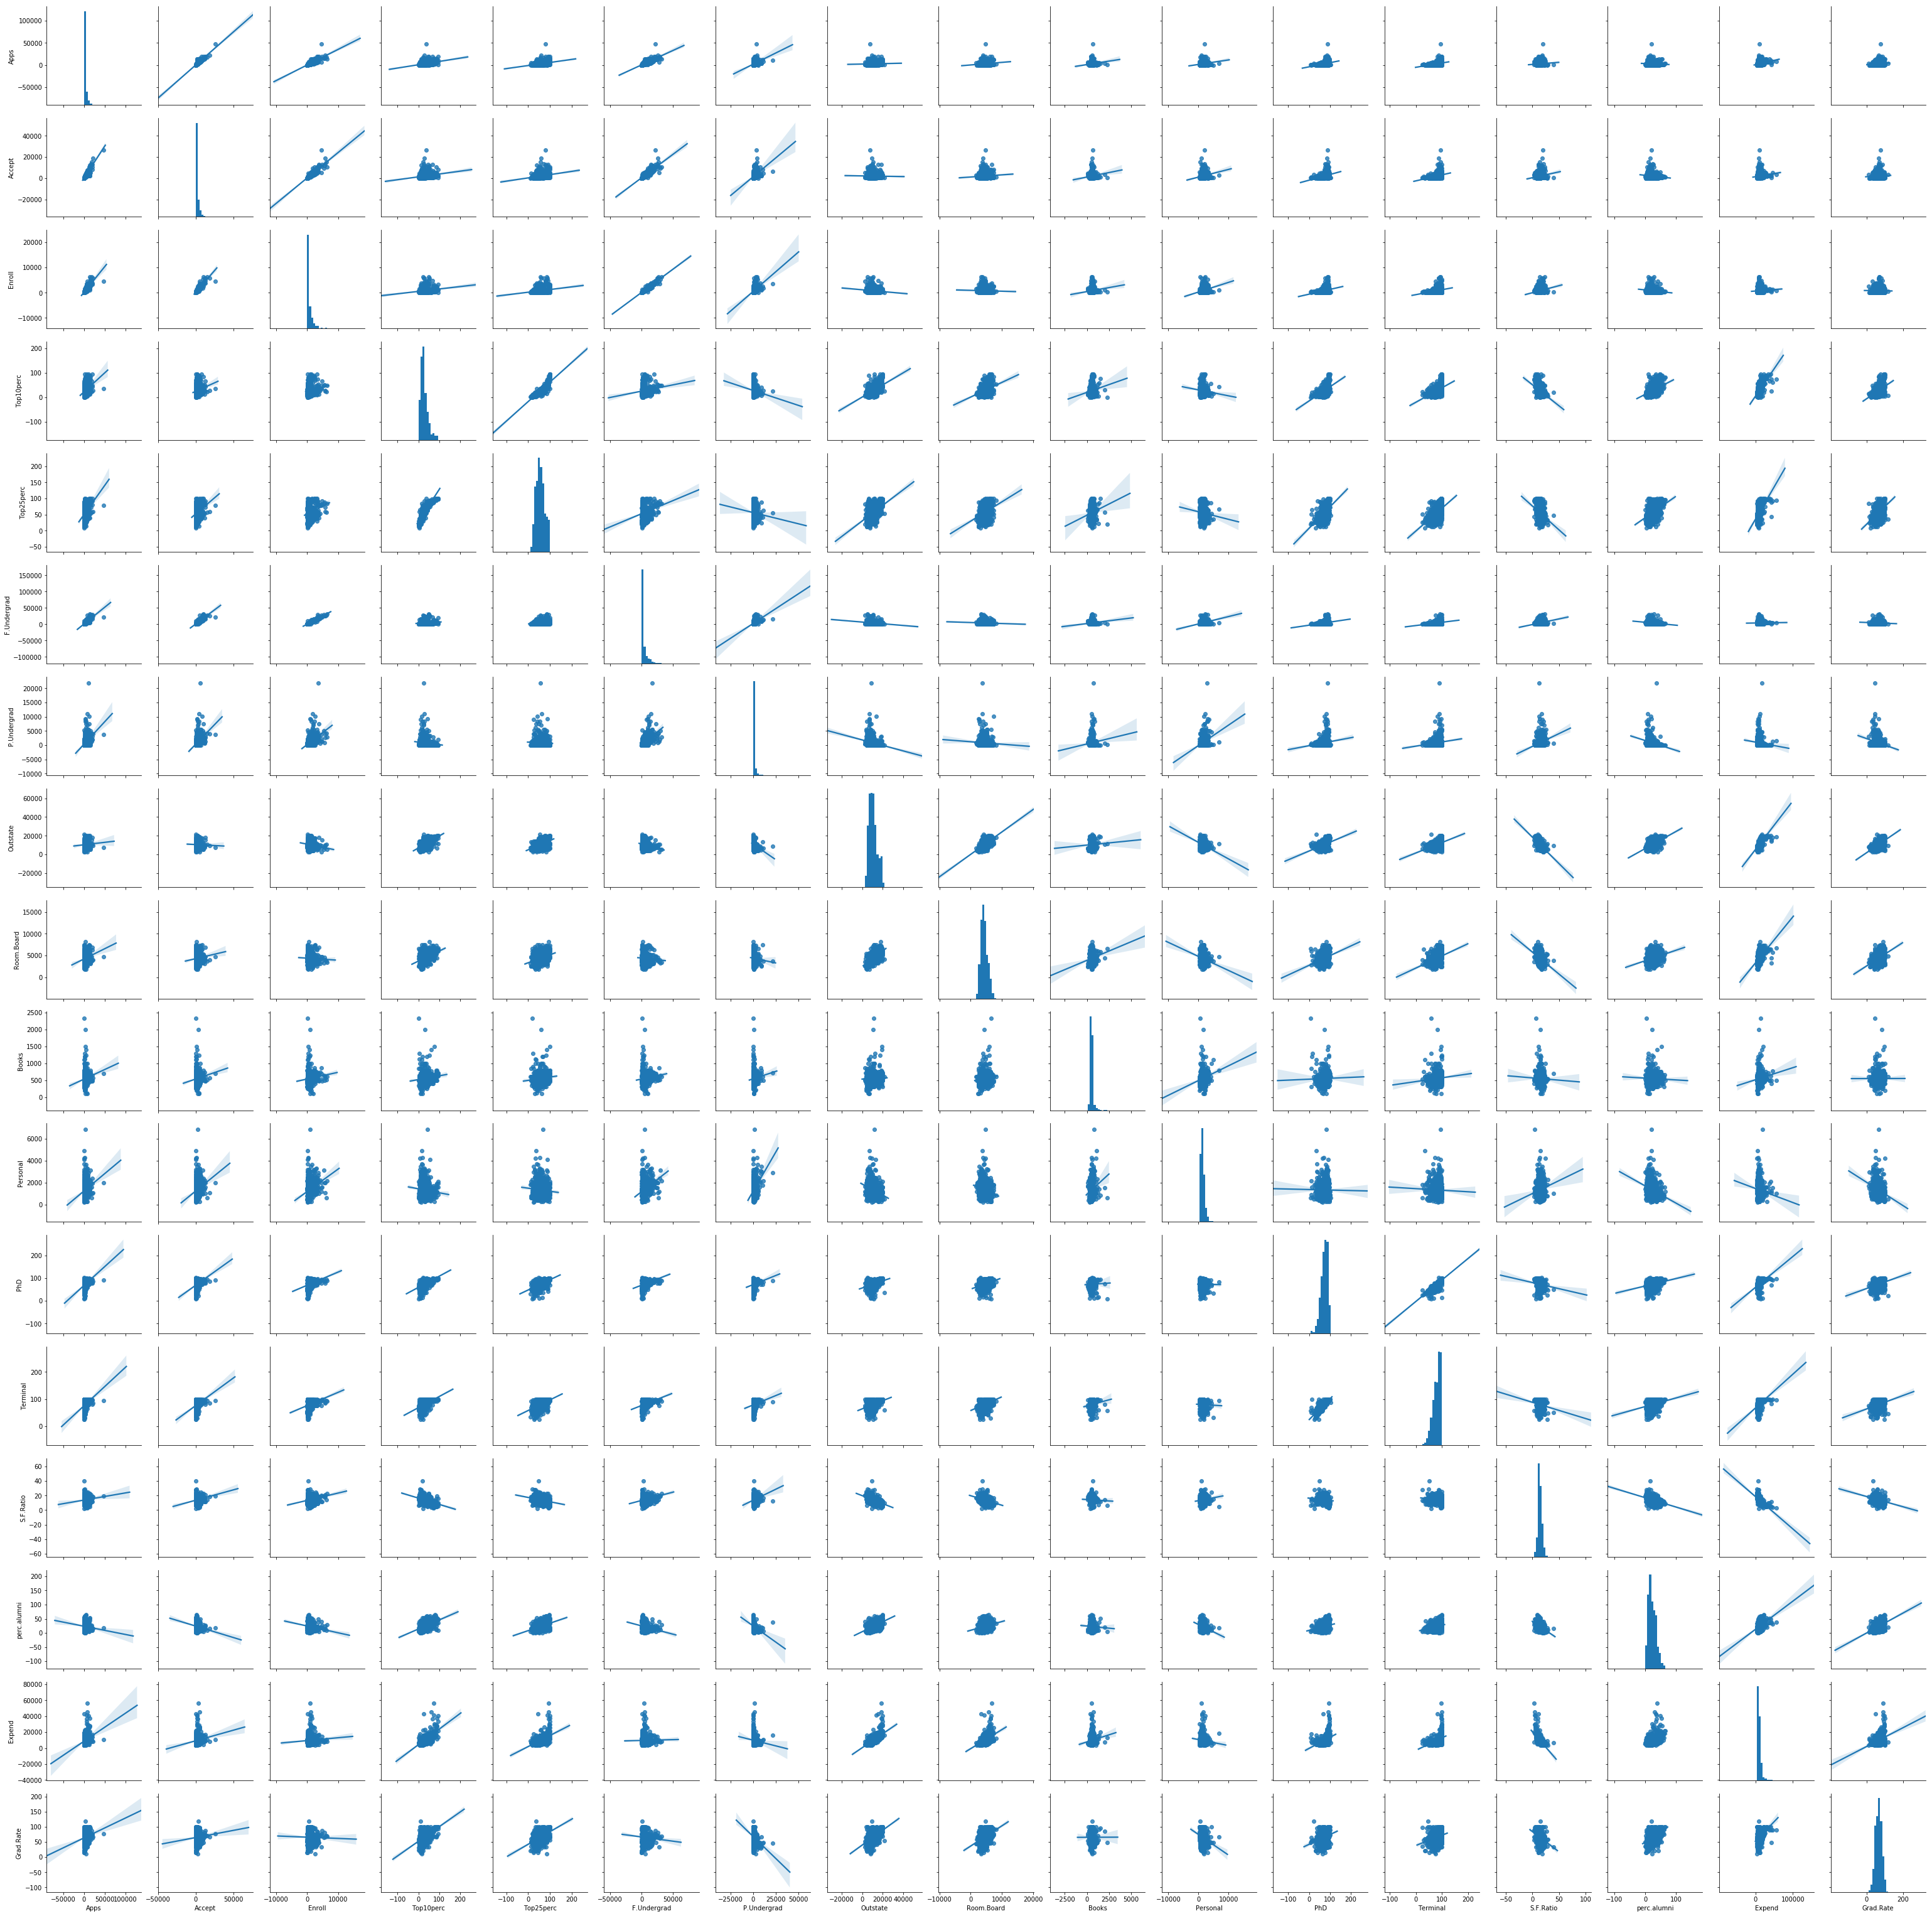

In [23]:
sns.pairplot(df,kind='reg')

In [132]:
dupes=df.duplicated()
sum(dupes)

0

In [57]:
IQR=df.quantile(0.75)-df.quantile(0.25)

In [60]:
out=((df.iloc[:,1:]<(df.quantile(0.25)-1.5*IQR)) | (df.iloc[:,1:]>(df.quantile(0.75)+1.5*IQR))).sum()
out

Apps           70
Accept         73
Enroll         79
Top10perc      39
Top25perc       0
F.Undergrad    97
P.Undergrad    67
Outstate        1
Room.Board      7
Books          46
Personal       20
PhD             8
Terminal        8
S.F.Ratio      12
perc.alumni     5
Expend         48
Grad.Rate       4
dtype: int64

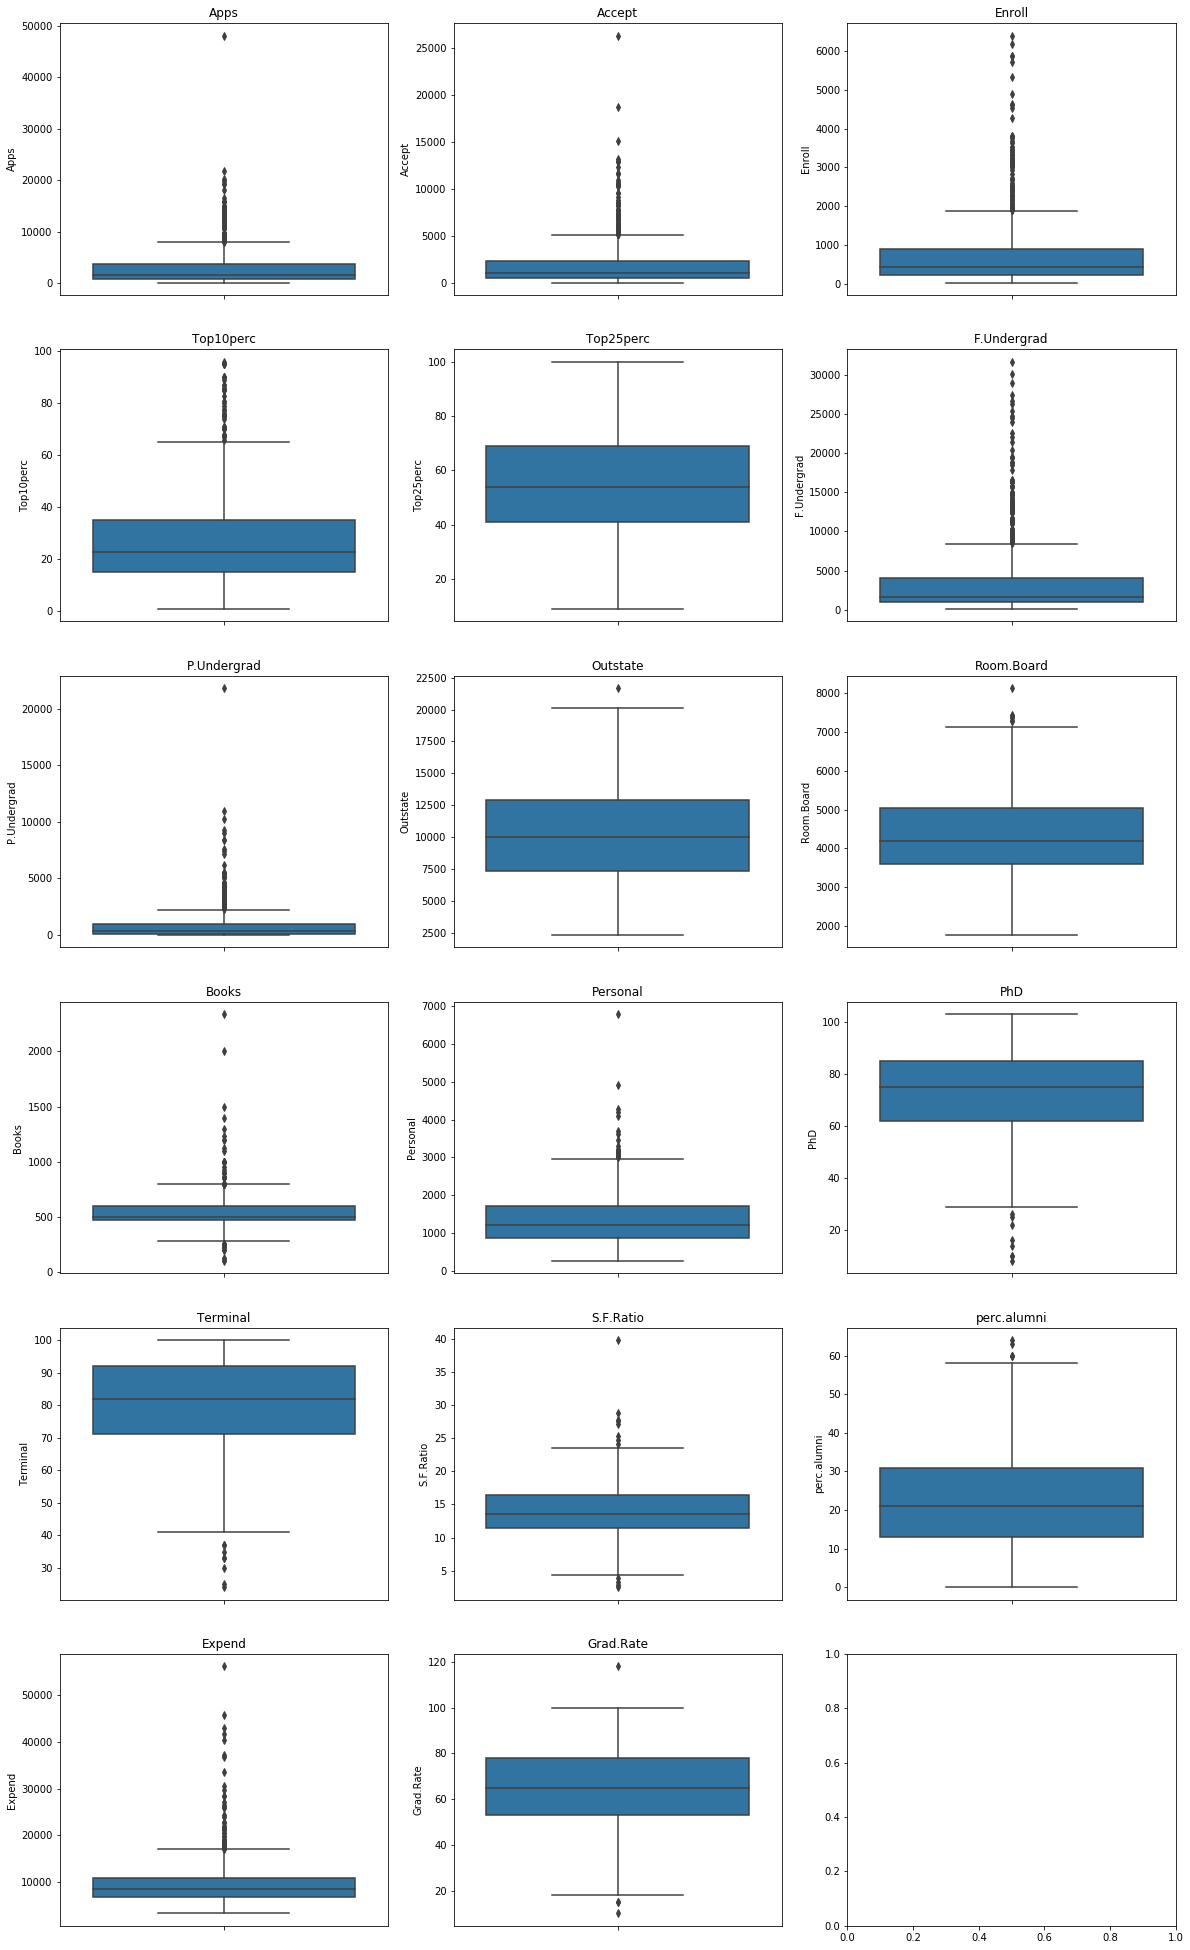

In [37]:
fig,ax=plt.subplots(nrows=6,ncols=3,sharey=False,sharex=False,figsize=(20,35))
sns.boxplot(x=df['Apps'],orient='v',ax=ax[0,0])
ax[0,0].title.set_text('Apps')
sns.boxplot(x=df['Accept'],orient='v',ax=ax[0,1])
ax[0,1].title.set_text('Accept')
sns.boxplot(x=df['Enroll'],orient='v',ax=ax[0,2])
ax[0,2].title.set_text('Enroll')
sns.boxplot(x=df['Top10perc'],orient='v',ax=ax[1,0])
ax[1,0].title.set_text('Top10perc')
sns.boxplot(x=df['Top25perc'],orient='v',ax=ax[1,1])
ax[1,1].title.set_text('Top25perc')
sns.boxplot(x=df['F.Undergrad'],orient='v',ax=ax[1,2])
ax[1,2].title.set_text('F.Undergrad')
sns.boxplot(x=df['P.Undergrad'],orient='v',ax=ax[2,0])
ax[2,0].title.set_text('P.Undergrad')
sns.boxplot(x=df['Outstate'],orient='v',ax=ax[2,1])
ax[2,1].title.set_text('Outstate')
sns.boxplot(x=df['Room.Board'],orient='v',ax=ax[2,2])
ax[2,2].title.set_text('Room.Board')
sns.boxplot(x=df['Books'],orient='v',ax=ax[3,0])
ax[3,0].title.set_text('Books')
sns.boxplot(x=df['Personal'],orient='v',ax=ax[3,1])
ax[3,1].title.set_text('Personal')
sns.boxplot(x=df['PhD'],orient='v',ax=ax[3,2])
ax[3,2].title.set_text('PhD')
sns.boxplot(x=df['Terminal'],orient='v',ax=ax[4,0])
ax[4,0].title.set_text('Terminal')
sns.boxplot(x=df['S.F.Ratio'],orient='v',ax=ax[4,1])
ax[4,1].title.set_text('S.F.Ratio')
sns.boxplot(x=df['perc.alumni'],orient='v',ax=ax[4,2])
ax[4,2].title.set_text('perc.alumni')
sns.boxplot(x=df['Expend'],orient='v',ax=ax[5,0])
ax[5,0].title.set_text('Expend')
sns.boxplot(x=df['Grad.Rate'],orient='v',ax=ax[5,1])
ax[5,1].title.set_text('Grad.Rate')

[Text(0,0,'Abilene Christian University'),
 Text(0,0,'Adelphi University'),
 Text(0,0,'Adrian College'),
 Text(0,0,'Agnes Scott College'),
 Text(0,0,'Alaska Pacific University'),
 Text(0,0,'Albertson College'),
 Text(0,0,'Albertus Magnus College'),
 Text(0,0,'Albion College'),
 Text(0,0,'Albright College'),
 Text(0,0,'Alderson-Broaddus College')]

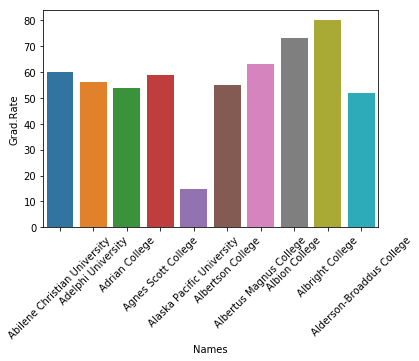

In [43]:
#plt.subplots(figsize=(10,15))
plt1=sns.barplot(x=df.Names.head(10),y='Grad.Rate',data=df)
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=45)

[Text(0,0,'Winthrop University'),
 Text(0,0,'Wisconsin Lutheran College'),
 Text(0,0,'Wittenberg University'),
 Text(0,0,'Wofford College'),
 Text(0,0,'Worcester Polytechnic Institute'),
 Text(0,0,'Worcester State College'),
 Text(0,0,'Xavier University'),
 Text(0,0,'Xavier University of Louisiana'),
 Text(0,0,'Yale University'),
 Text(0,0,'York College of Pennsylvania')]

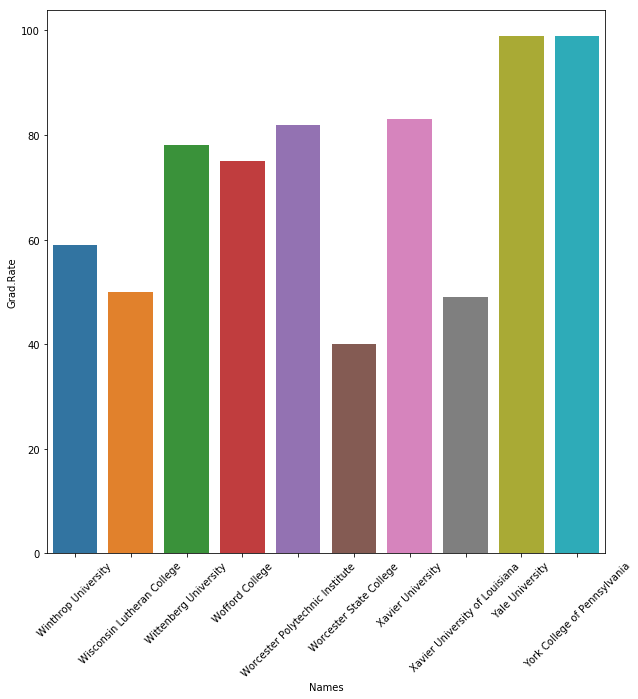

In [46]:
plt.subplots(figsize=(10,10))
plt1=sns.barplot(x=df.Names.tail(10),y='Grad.Rate',data=df)
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=45)

[Text(0,0,'Worcester State College'),
 Text(0,0,'Xavier University'),
 Text(0,0,'Xavier University of Louisiana'),
 Text(0,0,'Yale University'),
 Text(0,0,'York College of Pennsylvania')]

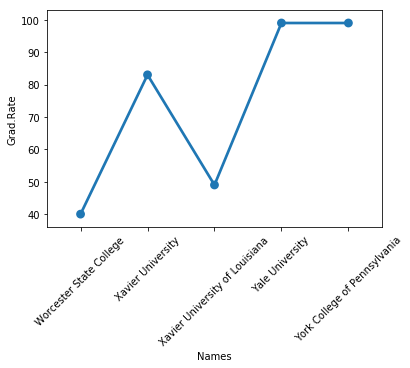

In [49]:
plt1=sns.pointplot(x=df.Names.tail(),y='Grad.Rate',data=df)
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=45)

<br/>

<b>2.2) Scale the variables and write the inference for using the type of scaling function for this case study.</b>

<b>StdScaler</b>

In [62]:
df1=df.copy()

In [63]:
from sklearn.preprocessing import StandardScaler
std_scale=StandardScaler()

In [66]:
df1['Apps_stdscale']=std_scale.fit_transform(df1[['Apps']])

In [67]:
df1['Apps_stdscale'].head()

0   -0.346882
1   -0.210884
2   -0.406866
3   -0.668261
4   -0.726176
Name: Apps_stdscale, dtype: float64

In [68]:
df1['Apps_stdscale'].min(),df1['Apps_stdscale'].max()

(-0.7551337089614527, 11.658671216805628)

In [69]:
df1['Apps_stdscale'].max()-df1['Apps_stdscale'].min()

12.41380492576708

In [70]:
df1['Apps_stdscale'].describe()

count    7.770000e+02
mean     6.355797e-17
std      1.000644e+00
min     -7.551337e-01
25%     -5.754408e-01
50%     -3.732540e-01
75%      1.609122e-01
max      1.165867e+01
Name: Apps_stdscale, dtype: float64

<br/>

<b>MinMaxScaler</b>

In [71]:
from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler()

In [76]:
df1['Apps_minmaxscale']=minmax_scale.fit_transform(df1[['Apps']])

In [77]:
df1['Apps_minmaxscale'].head()

0    0.032887
1    0.043842
2    0.028055
3    0.006998
4    0.002333
Name: Apps_minmaxscale, dtype: float64

In [78]:
df1['Apps_minmaxscale'].min(),df1['Apps_minmaxscale'].max()

(0.0, 1.0)

In [79]:
df1['Apps_minmaxscale'].describe()

count    777.000000
mean       0.060830
std        0.080607
min        0.000000
25%        0.014475
50%        0.030763
75%        0.073793
max        1.000000
Name: Apps_minmaxscale, dtype: float64

<br/>

<b>LogTransformer</b>

In [80]:
from sklearn.preprocessing import FunctionTransformer   
log_transformer = FunctionTransformer(np.log1p)

In [81]:
df1['Apps_logtrans']=log_transformer.fit_transform(df1[['Apps']])

In [83]:
df1['Apps_logtrans'].min(),df1['Apps_logtrans'].max()

(4.406719247264253, 10.780933500586716)

In [84]:
df1['Apps_logtrans'].describe()

count    777.000000
mean       7.427593
std        1.072769
min        4.406719
25%        6.655440
50%        7.351800
75%        8.195610
max       10.780934
Name: Apps_logtrans, dtype: float64

<br/>

<b>ExponentialTransform</b>

In [87]:
exp_transformer = FunctionTransformer(np.exp)

In [89]:
df1['Apps_Exptrans']=exp_transformer.fit_transform(df1[['Apps']])

In [90]:
df1['Apps_Exptrans'].min(),df1['Apps_Exptrans'].max()

(1.5060973145850306e+35, inf)

In [91]:
df1['Apps_Exptrans'].describe()

count    7.770000e+02
mean              inf
std               NaN
min      1.506097e+35
25%               NaN
50%               NaN
75%               NaN
max               inf
Name: Apps_Exptrans, dtype: float64

<br/>

<b>2.3) Comment on the comparison between covariance and the correlation matrix.</b>

In [93]:
df.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


In [94]:
df.cov()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.497846e+07,8.949860e+06,3.045256e+06,23132.773138,26952.663479,1.528970e+07,2.346620e+06,7.809704e+05,7.000729e+05,84703.752639,4.683468e+05,24689.433666,21053.067602,1465.060576,-4327.122381,5.246171e+06,9756.421641
Accept,8.949860e+06,6.007960e+06,2.076268e+06,8321.124872,12013.404757,1.039358e+07,1.646670e+06,-2.539623e+05,2.443471e+05,45942.807867,3.335566e+05,14238.201489,12182.093828,1709.838189,-4859.487022,1.596272e+06,2834.162918
Enroll,3.045256e+06,2.076268e+06,8.633684e+05,2971.583415,4172.592435,4.347530e+06,7.257907e+05,-5.811885e+05,-4.099706e+04,17291.199742,1.767380e+05,5028.961166,4217.086027,872.684773,-2081.693787,3.113454e+05,-356.587977
Top10perc,2.313277e+04,8.321125e+03,2.971583e+03,311.182456,311.630480,1.208911e+04,-2.829475e+03,3.990718e+04,7.186706e+03,346.177405,-1.114551e+03,153.184870,127.551581,-26.874525,99.567208,6.087931e+04,149.992164
Top25perc,2.695266e+04,1.201340e+04,4.172592e+03,311.630480,392.229216,1.915895e+04,-1.615412e+03,3.899243e+04,7.199904e+03,377.759266,-1.083605e+03,176.518449,153.002612,-23.097199,102.550946,5.454648e+04,162.371398
F.Undergrad,1.528970e+07,1.039358e+07,4.347530e+06,12089.113681,19158.952782,2.352658e+07,4.212910e+06,-4.209843e+06,-3.664582e+05,92535.764728,1.041709e+06,25211.784197,21424.241746,5370.208581,-13791.929691,4.724040e+05,-6563.307527
P.Undergrad,2.346620e+06,1.646670e+06,7.257907e+05,-2829.474981,-1615.412144,4.212910e+06,2.317799e+06,-1.552704e+06,-1.023919e+05,20410.446674,3.297324e+05,3706.756219,3180.596615,1401.302563,-5297.337090,-6.643512e+05,-6721.062488
Outstate,7.809704e+05,-2.539623e+05,-5.811885e+05,39907.179832,38992.427500,-4.209843e+06,-1.552704e+06,1.618466e+07,2.886597e+06,25808.242145,-8.146737e+05,25157.515051,24164.147673,-8835.253539,28229.553066,1.413324e+07,39479.681796
Room.Board,7.000729e+05,2.443471e+05,-4.099706e+04,7186.705605,7199.903568,-3.664582e+05,-1.023919e+05,2.886597e+06,1.202743e+06,23170.313390,-1.480838e+05,5895.034749,6047.299735,-1574.205914,3701.431379,2.873308e+06,8005.360183
Books,8.470375e+04,4.594281e+04,1.729120e+04,346.177405,377.759266,9.253576e+04,2.041045e+04,2.580824e+04,2.317031e+04,27259.779946,2.004303e+04,72.534242,242.963918,-20.867207,-82.263132,9.691258e+04,3.008837


<br/>

<b>2.4) Check the dataset for outliers before and after scaling. Draw your inferences from this exercise.</b>

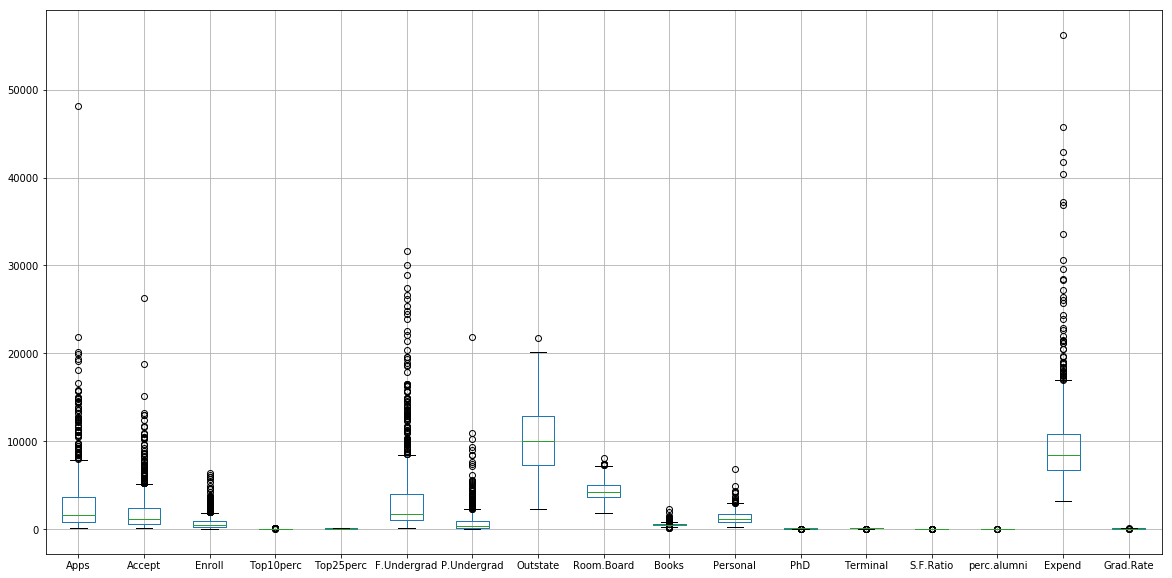

In [96]:
df.boxplot(figsize=(20,10))

In [134]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [135]:
lApps,uApps=remove_outlier(df['Apps'])
df['Apps']=np.where(df['Apps']>uApps,uApps,df['Apps'])
df['Apps']=np.where(df['Apps']<lApps,lApps,df['Apps'])

lAccept,uAccept=remove_outlier(df['Accept'])
df['Accept']=np.where(df['Accept']>uAccept,uAccept,df['Accept'])
df['Accept']=np.where(df['Accept']<lAccept,lAccept,df['Accept'])

In [136]:
lEnroll,uEnroll=remove_outlier(df['Enroll'])
df['Enroll']=np.where(df['Enroll']>uEnroll,uEnroll,df['Enroll'])
df['Enroll']=np.where(df['Enroll']<lEnroll,lEnroll,df['Enroll'])

lTop10perc,uTop10perc=remove_outlier(df['Top10perc'])
df['Top10perc']=np.where(df['Top10perc']>uTop10perc,uTop10perc,df['Top10perc'])
df['Top10perc']=np.where(df['Top10perc']<lTop10perc,lTop10perc,df['Top10perc'])

In [137]:
lFunderg,uFunderg=remove_outlier(df['F.Undergrad'])
df['F.Undergrad']=np.where(df['F.Undergrad']>uFunderg,uFunderg,df['F.Undergrad'])
df['F.Undergrad']=np.where(df['F.Undergrad']<lFunderg,lFunderg,df['F.Undergrad'])

lPunderg,uPunderg=remove_outlier(df['P.Undergrad'])
df['P.Undergrad']=np.where(df['P.Undergrad']>uPunderg,uPunderg,df['P.Undergrad'])
df['P.Undergrad']=np.where(df['P.Undergrad']<lPunderg,lPunderg,df['P.Undergrad'])

In [138]:
lOutstate,uOutstate=remove_outlier(df['Outstate'])
df['Outstate']=np.where(df['Outstate']>uOutstate,uOutstate,df['Outstate'])
df['Outstate']=np.where(df['Outstate']<lOutstate,lOutstate,df['Outstate'])

lRoomBoard,uRoomBoard=remove_outlier(df['Room.Board'])
df['Room.Board']=np.where(df['Room.Board']>uRoomBoard,uRoomBoard,df['Room.Board'])
df['Room.Board']=np.where(df['Room.Board']<lRoomBoard,lRoomBoard,df['Room.Board'])

In [139]:
lBooks,uBooks=remove_outlier(df['Books'])
df['Books']=np.where(df['Books']>uBooks,uBooks,df['Books'])
df['Books']=np.where(df['Books']<lBooks,lBooks,df['Books'])

lPersonal,uPersonal=remove_outlier(df['Personal'])
df['Personal']=np.where(df['Personal']>uPersonal,uPersonal,df['Personal'])
df['Personal']=np.where(df['Personal']<lPersonal,lPersonal,df['Personal'])

In [140]:
lPhD,uPhD=remove_outlier(df['PhD'])
df['PhD']=np.where(df['PhD']>uPhD,uPhD,df['PhD'])
df['PhD']=np.where(df['PhD']<lPhD,lPhD,df['PhD'])

lTerminal,uTerminal=remove_outlier(df['Terminal'])
df['Terminal']=np.where(df['Terminal']>uTerminal,uTerminal,df['Terminal'])
df['Terminal']=np.where(df['Terminal']<lTerminal,lTerminal,df['Terminal'])

In [141]:
lSFratio,uSFratio=remove_outlier(df['S.F.Ratio'])
df['S.F.Ratio']=np.where(df['S.F.Ratio']>uSFratio,uSFratio,df['S.F.Ratio'])
df['S.F.Ratio']=np.where(df['S.F.Ratio']<lSFratio,lSFratio,df['S.F.Ratio'])

lpercalumni,upercalumni=remove_outlier(df['perc.alumni'])
df['perc.alumni']=np.where(df['perc.alumni']>upercalumni,upercalumni,df['perc.alumni'])
df['perc.alumni']=np.where(df['perc.alumni']<lpercalumni,lpercalumni,df['perc.alumni'])

lExpend,uExpend=remove_outlier(df['Expend'])
df['Expend']=np.where(df['Expend']>uExpend,uExpend,df['Expend'])
df['Expend']=np.where(df['Expend']<lExpend,lExpend,df['Expend'])

lGradRate,uGradRate=remove_outlier(df['Grad.Rate'])
df['Grad.Rate']=np.where(df['Grad.Rate']>uGradRate,uGradRate,df['Grad.Rate'])
df['Grad.Rate']=np.where(df['Grad.Rate']<lGradRate,lGradRate,df['Grad.Rate'])

In [133]:
df.drop('Names',axis=1,inplace=True)

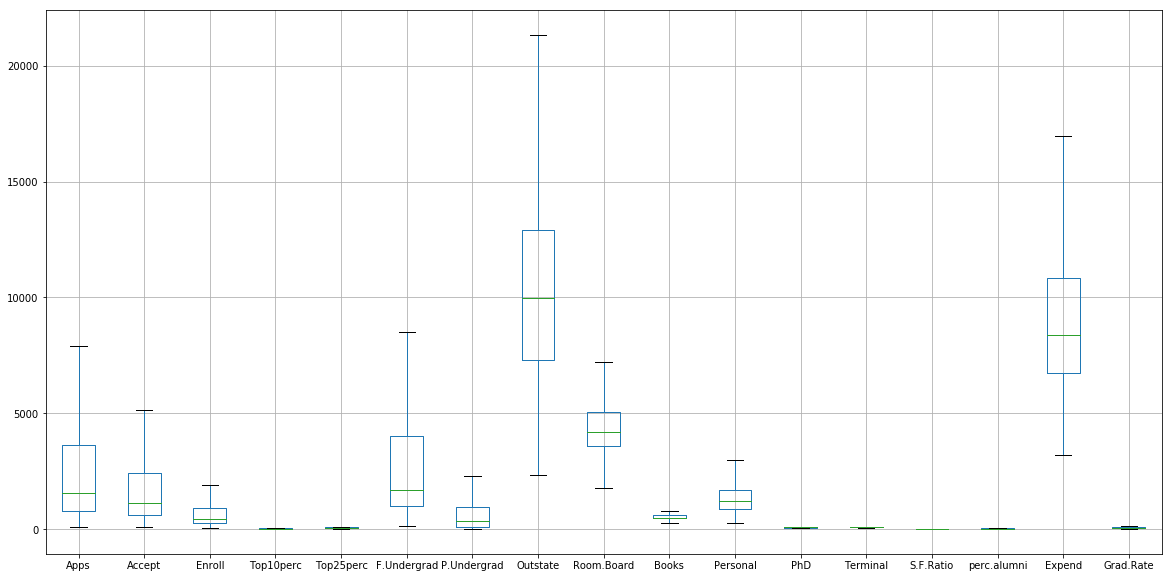

In [113]:
df.boxplot(figsize=(20,10))

In [142]:
from scipy.stats import zscore
df_new=df.apply(zscore)
df_new.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.376493,-0.337830,0.106380,-0.246780,-0.191827,-0.018769,-0.166083,-0.746480,-0.968324,-0.776567,1.438500,-0.174045,-0.123239,1.070602,-0.870466,-0.630916,-0.319205
1,-0.159195,0.116744,-0.260441,-0.696290,-1.353911,-0.093626,0.797856,0.457762,1.921680,1.828605,0.289289,-2.745731,-2.785068,-0.489511,-0.545726,0.396097,-0.552693
2,-0.472336,-0.426511,-0.569343,-0.310996,-0.292878,-0.703966,-0.777974,0.201488,-0.555466,-1.210762,-0.260691,-1.240354,-0.952900,-0.304413,0.590864,-0.131845,-0.669437
3,-0.889994,-0.917871,-0.918613,2.129202,1.677612,-0.898889,-0.828267,0.626954,1.004218,-0.776567,-0.736792,1.205884,1.190391,-1.679429,1.159159,2.287940,-0.377577
4,-0.982532,-1.051221,-1.062533,-0.696290,-0.596031,-0.995610,0.297726,-0.716623,-0.216006,2.219381,0.289289,0.202299,-0.538069,-0.568839,-1.682316,0.512468,-2.916759


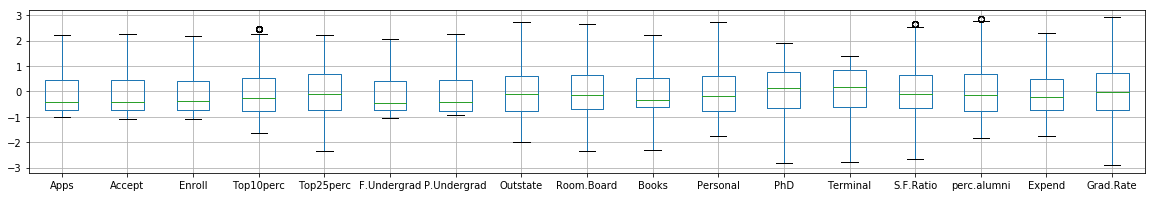

In [143]:
df_new.boxplot(figsize=(20,3))

<br/>

<b>2.5) Build the covariance matrix, eigenvalues and eigenvector.</b>

In [144]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(df_new.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866e+00  9.56537704e-01  8.98039052e-01  3.21756324e-01
   3.64960691e-01  8.62111140e-01  5.20492952e-01  6.54209711e-02
   1.87717056e-01  2.36441941e-01  2.30243993e-01  4.64521757e-01
   4.35037784e-01  1.26573895e-01 -1.01288006e-01  2.43248206e-01
   1.50997775e-01]
 [ 9.56537704e-01  1.00128866e+00  9.36482483e-01  2.23586208e-01
   2.74033187e-01  8.98189799e-01  5.73428908e-01 -5.00874847e-03
   1.19740419e-01  2.08974091e-01  2.56676290e-01  4.27891234e-01
   4.03929238e-01  1.88748711e-01 -1.65728801e-01  1.62016688e-01
   7.90839722e-02]
 [ 8.98039052e-01  9.36482483e-01  1.00128866e+00  1.71977357e-01
   2.30730728e-01  9.68548601e-01  6.42421828e-01 -1.55856056e-01
  -2.38762560e-02  2.02317274e-01  3.39785395e-01  3.82031198e-01
   3.54835877e-01  2.74622251e-01 -2.23009677e-01  5.42906862e-02
  -2.32810071e-02]
 [ 3.21756324e-01  2.23586208e-01  1.71977357e-01  1.00128866e+00
   9.15052977e-01  1.11358019e-01 -1.80240778e-01  5.62884044e-

In [145]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-2.62171542e-01  3.14136258e-01  8.10177245e-02 -9.87761685e-02
  -2.19898081e-01  2.18800617e-03 -2.83715076e-02 -8.99498102e-02
   1.30566998e-01 -1.56464458e-01 -8.62132843e-02  1.82169814e-01
  -5.99137640e-01  8.99775288e-02  8.88697944e-02  5.49428396e-01
   5.41453698e-03]
 [-2.30562461e-01  3.44623583e-01  1.07658626e-01 -1.18140437e-01
  -1.89634940e-01 -1.65212882e-02 -1.29584896e-02 -1.37606312e-01
   1.42275847e-01 -1.49209799e-01 -4.25899061e-02 -3.91041719e-01
   6.61496927e-01  1.58861886e-01  4.37945938e-02  2.91572312e-01
   1.44582845e-02]
 [-1.89276397e-01  3.82813322e-01  8.55296892e-02 -9.30717094e-03
  -1.62314818e-01 -6.80794143e-02 -1.52403625e-02 -1.44216938e-01
   5.08712481e-02 -6.48997860e-02 -4.38408622e-02  7.16684935e-01
   2.33235272e-01 -3.53988202e-02 -6.19241658e-02 -4.17001280e-01
  -4.97908902e-02]
 [-3.38874521e-01 -9.93191661e-02 -7.88293849e-02  3.69115031e-01
  -1.57211016e-01 -8.88656824e-02 -2.57455284e-01  2.89538833e-01
 

<br/>

<b>2.6) Write the explicit form of the first PC (in terms of Eigen Vectors)</b>

<b>A:In generic first PC can be represented using linear combination of features and its coefficients/weights<br/>
    PC1=w11 * X1+w12 * X2+w13 * X3+w14 * X4.......<br/>
    where X1,X2,X3,X4... are original variables/features before transformation.<br/>
    <br/>
    In this scenario PC1 can be represented as linear combination of below components<br/>
    [w11 w12 w13 w14....w117]=<br/>
    [[-2.62171542e-01    3.14136258e-01     8.10177245e-02    -9.87761685e-02<br/>
      -2.19898081e-01    2.18800617e-03    -2.83715076e-02    -8.99498102e-02<br/>
       1.30566998e-01   -1.56464458e-01    -8.62132843e-02     1.82169814e-01<br/>
      -5.99137640e-01    8.99775288e-02     8.88697944e-02     5.49428396e-01<br/>
       5.41453698e-03]<br/>
    [X1 X2 X3.......X17]=['Apps' 'Accept' 'Enroll' 'Top10Perc' 'Top25Perc' 'F.Undergrad' 'P.Undergrad' 'Outstate'<br/>
                          'Room.Board' 'Books' 'Personal' 'PhD' 'Terminal' 'S.F.Ratio' 'perc.alumni' 'Expend'<br/>
                          'Grad.rate']</b>  
    

<br/>

<b>2.7) Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate? 
Perform PCA and export the data of the Principal Component scores into a data frame.</b>

In [146]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 33.26608367  62.02142867  68.63859223  74.53673619  79.66062886
  84.15926753  87.59551019  90.79435736  93.28246491  95.52086136
  96.97201814  97.83716159  98.62640821  99.20703552  99.64582321
  99.86844192 100.        ]


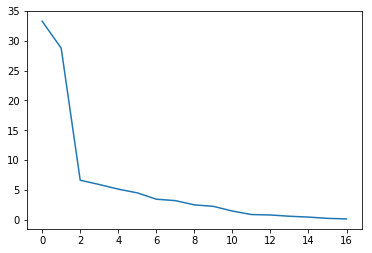

In [121]:
plt.plot(var_exp)

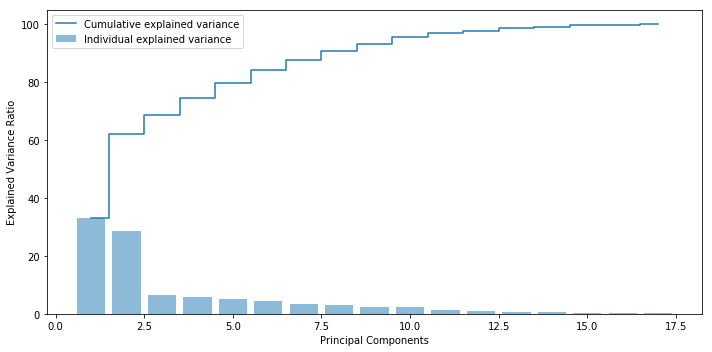

In [122]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [123]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
df_reduced = pca.fit_transform(df_new)
df_reduced.transpose()

array([[-1.60249937, -1.80467545, -1.60828257, ..., -0.57688267,
         6.570952  , -0.47739307],
       [ 0.99368301, -0.07041499, -1.38279212, ...,  0.01779846,
        -1.18493014,  1.04394672],
       [ 0.0300448 ,  2.12212748, -0.50151255, ...,  0.32216033,
         1.32596571, -1.42543834],
       [-1.00842232,  3.13894103, -0.03637346, ..., -0.58725875,
         0.0777073 , -1.30027366],
       [-0.36688631,  2.45321198,  0.76599686, ...,  0.17522461,
         1.36851641,  0.72091758],
       [-0.69747576,  0.99485843, -1.02623665, ...,  0.50404278,
        -0.82274543,  1.05180972]])

In [124]:
#components for the current run
pca.components_

array([[ 2.62171542e-01,  2.30562461e-01,  1.89276397e-01,
         3.38874521e-01,  3.34690532e-01,  1.63293010e-01,
         2.24797091e-02,  2.83547285e-01,  2.44186588e-01,
         9.67082754e-02, -3.52299594e-02,  3.26410696e-01,
         3.23115980e-01, -1.63151642e-01,  1.86610828e-01,
         3.28955847e-01,  2.38822447e-01],
       [ 3.14136258e-01,  3.44623583e-01,  3.82813322e-01,
        -9.93191661e-02, -5.95055011e-02,  3.98636372e-01,
         3.57550046e-01, -2.51863617e-01, -1.31909124e-01,
         9.39739472e-02,  2.32439594e-01,  5.51390195e-02,
         4.30332048e-02,  2.59804556e-01, -2.57092552e-01,
        -1.60008951e-01, -1.67523664e-01],
       [-8.10177238e-02, -1.07658627e-01, -8.55296859e-02,
         7.88293846e-02,  5.07938248e-02, -7.37077853e-02,
        -4.03568699e-02, -1.49394795e-02,  2.11379165e-02,
         6.97121128e-01,  5.30972806e-01, -8.11134043e-02,
        -5.89785929e-02, -2.74150657e-01, -1.03715887e-01,
         1.84205687e-01, -2.4

In [126]:
#PCA score
df_comp = pd.DataFrame(pca.components_,columns=list(df_new))
df_comp.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.262172,0.230562,0.189276,0.338875,0.334691,0.163293,0.022480,0.283547,0.244187,0.096708,-0.035230,0.326411,0.323116,-0.163152,0.186611,0.328956,0.238822
1,0.314136,0.344624,0.382813,-0.099319,-0.059506,0.398636,0.357550,-0.251864,-0.131909,0.093974,0.232440,0.055139,0.043033,0.259805,-0.257093,-0.160009,-0.167524
2,-0.081018,-0.107659,-0.085530,0.078829,0.050794,-0.073708,-0.040357,-0.014939,0.021138,0.697121,0.530973,-0.081113,-0.058979,-0.274151,-0.103716,0.184206,-0.245336
3,0.098776,0.118140,0.009307,-0.369115,-0.416824,0.013950,0.225351,0.262975,0.580894,-0.036156,-0.114983,-0.147261,-0.089008,-0.259486,-0.223982,0.213756,-0.036192
4,0.219898,0.189635,0.162315,0.157211,0.144449,0.102728,-0.095679,0.037275,-0.069108,0.035406,-0.000475,-0.550787,-0.590407,-0.142843,0.128216,-0.022424,0.356843


<br/>

<b>2.8) Mention the business implication of using the Principal Component Analysis for this case study.</b>

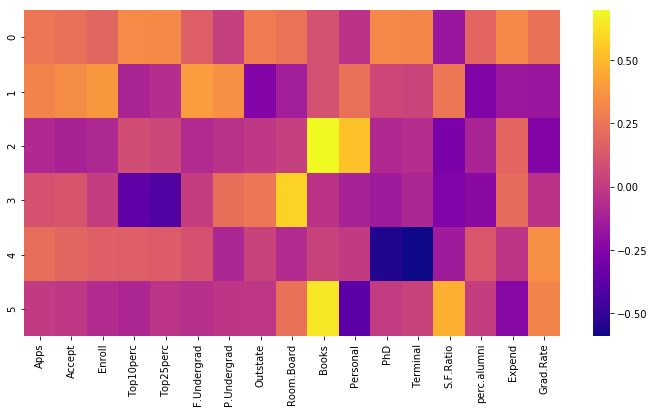

In [128]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma')

In [130]:
# This heatmap and the color bar basically represent the correlation between the various feature 
# and the principal component itself
# Component 5 looks more related to books.
# PC1 could be labeled with Top10Perc,Top25Perc  
# Depending on relations ship, we could go ahead and label relationship with features